In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats
from nba_api.stats.endpoints.leaguehustlestatsteam import LeagueHustleStatsTeam
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [4]:
player_touches = LeagueDashPtStats(player_or_team='Player', per_mode_simple='PerGame', season='2021-22', pt_measure_type='Possessions').get_data_frames()[0]

In [5]:
player_movemnt = LeagueDashPtStats(player_or_team='Player', per_mode_simple='PerGame', season='2021-22', pt_measure_type='SpeedDistance').get_data_frames()[0]

In [7]:
merged_df = pd.merge(left=player_touches, right=player_movemnt, on=('PLAYER_ID', 'PLAYER_NAME'))

In [13]:
top_players = merged_df.loc[merged_df.GP_x > 15].sort_values(by='TOUCHES', ascending=False).iloc[:40]

In [14]:
plt.style.use('fivethirtyeight')

In [32]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


import matplotlib.ticker as mtick

zoom = 0.7
team_root_dir = '../../team_logos_id/'
player_root_dir = 'player_imgs/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

Text(0.5, 1.0, 'Who is the most active player?\n(among top 40 players in touches per game)')

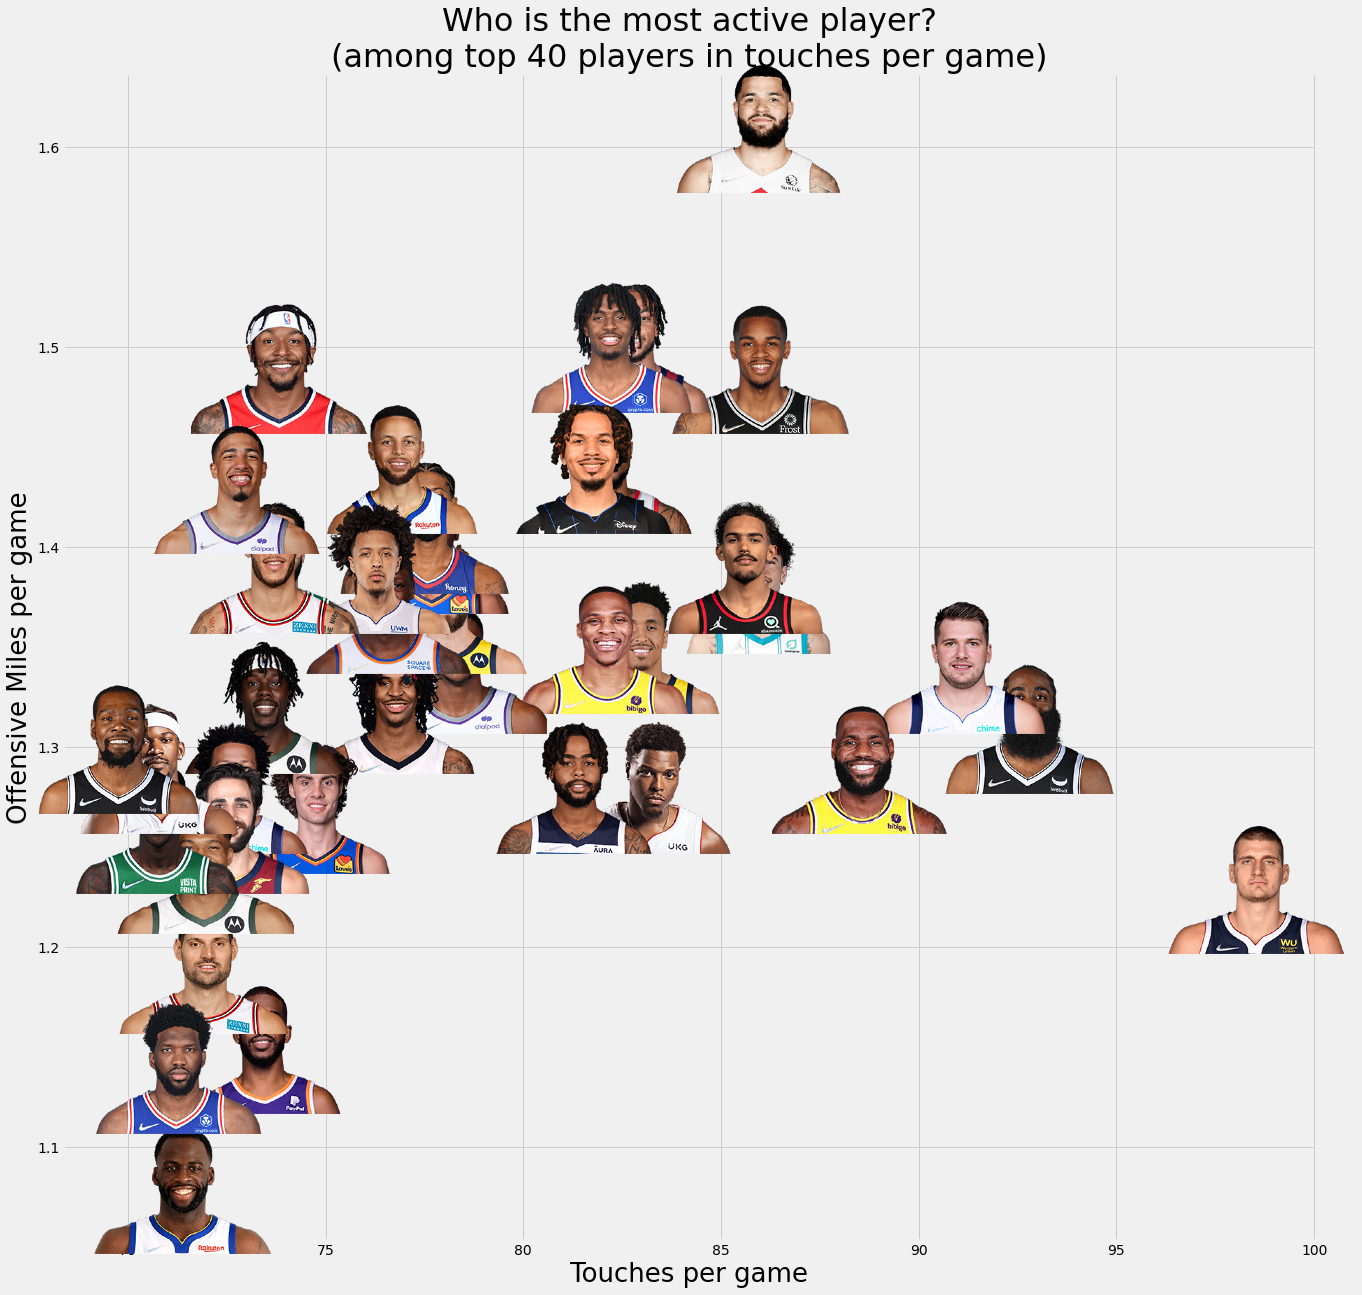

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(top_players.TOUCHES, y=top_players.DIST_MILES_OFF, s=10)

for i in range(len(top_players)):
    item = top_players.iloc[i]
    ab = AnnotationBbox(get_player_img(item.PLAYER_ID), (item.TOUCHES, item.DIST_MILES_OFF), frameon=False)
    ax.add_artist(ab)
    

ax.set_ylabel("Offensive Miles per game", size=26)
ax.set_xlabel("Touches per game", size=26)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Who is the most active player?\n(among top 40 players in touches per game)", size=32)